[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[504  61]]

 [[397  27]]

 [[250  39]]

 [[227  25]]

 [[188  33]]

 [[126  63]]

 [[126 154]]

 [[136 186]]

 [[153 197]]

 [[176 174]]

 [[181 184]]

 [[184 216]]

 [[161 251]]

 [[155 282]]

 [[173 317]]

 [[204 329]]

 [[191 357]]

 [[201 377]]

 [[234 398]]

 [[253 395]]

 [[281 376]]

 [[331 305]]

 [[426 272]]

 [[447 245]]

 [[448 212]]

 [[486 168]]

 [[515  85]]

 [[513  70]]]
start_mid角度: 175 度
mid_end角度:   175 度
合成画像が保存されました。


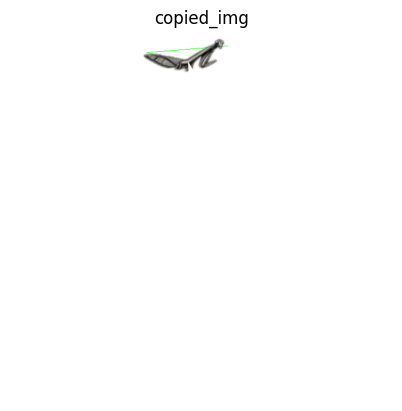

In [50]:
# 改善AI_wakuta!!!

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

#
# モード設定変数(共通)
#
USE_LINE_INSECT = 3 # [昆虫画像256/line切り替え設定] 2: AIの線画 0: 256昆虫画像を使用する 1: line昆虫画像を使用する
DISP_DOG_WINDOW = 0 # [犬画像の表示設定] 0:最終画像以外の表示なし 1: 初期ロード直後の画像も表示 2: さらに、輪郭抽出時の加工画像等も表示
BUNKATSU = 4 #中間層の分割数

#
# モード設定変数(輪郭配置関連)
#
PLACE_EDGE_INSECTS = 1 # 0:輪郭線沿いに昆虫を表示しない 1:輪郭線沿いに昆虫を表示する
DRAW_EDGE_FIGURE = 1 # 1:昆虫画像位置ガイドとしての直線・楕円を描画する  0:昆虫画像位置ガイドとしての直線・楕円を描画しない
DISP_EDGE_INSECT_WINDOW = 0 # [別ウィンドウでの昆虫の表示] 0:表示なし 1: アフィン変換後の画像を表示 2: さらに、初期ロード直後の画像も表示

#
# モード設定変数(内部配置関連)
#
PLACE_INNER_INSECTS = 0 # 0:内側に昆虫を表示しない 1:内側に昆虫を表示する
DRAW_INNER_FIGURE = 0 # 1:昆虫画像位置ガイドとしての直線・楕円を描画する  0:昆虫画像位置ガイドとしての直線・楕円を描画しない
DISP_INNER_INSECT_WINDOW = 0 # [別ウィンドウでの昆虫の表示] 0:表示なし 1: アフィン変換後の画像を表示 2: さらに、初期ロード直後の画像も表示

#
# モード設定変数(パーツ上配置関連)
#
PLACE_PARTS_INSECTS = 1 # 0:パーツ上に昆虫を表示しない 1:パーツ上に昆虫を表示する
DRAW_PARTS_FIGURE = 0 # 0:パーツ輪郭線を表示しない  1:パーツパーツ輪郭線を表示する
DISP_PARTS_INSECT_WINDOW = 0 # [別ウィンドウでの昆虫・パーツの表示] 0:表示なし 1: 選択決定後の昆虫画像も表示 2: 選択決定後の昆虫画像及びパーツそれぞれの矩形検出状況も表示
AROUND_FLAG = 0 #パーツ周辺層の有無

RED = (0, 0, 255)
GREEN = (0, 255, 0)
DARKGREEN = (48, 232, 48)
CYAN = (255, 192, 0)
BLUE = (255, 0, 0)
BROWN = (42, 42, 165)
BLACK = (0, 0, 0)
YELLOW = (0, 255, 255)

THCK = 1
THCK2 = 2

# 昆虫名称群(全て)
insect_images_all = [
    'beetle','beetle2', 'gomimusi','gomimusi2','gomimusi3', 'kamemusi','kamemusi2','kamemusi3', 
    'kogane','kogane2','kogane3', 'maimai','maimai2','maimai3', 'tobiiro', 'vespa','vespa2','vespa3',
    'yokobai','yokobai2','yokobai3',
]
#################################################
insect_images_all_2 = [
    'beetle','beetle2', 'gomimusi', 'kamemusi','kamemusi2','kamemusi3', 
    'kogane','kogane2','kogane3', 'maimai','maimai2','maimai3', 'tobiiro', 'vespa','vespa2','vespa3',
    'yokobai','yokobai2','yokobai3',
]

# 昆虫名称群(非側面画像)
insect_images = [
    'beetle', 'gomimusi', 'kamemusi', 'kogane', 'maimai', 'tobiiro', 'vespa', 'yokobai',
]
#########################################
insect_images_AI = [
    'beetle', 'kamemusi', 'maimai', 'mantis','vespa','snail', 'weevil', 'locust',
]
insect_images_AI_new = [
    'hornet6', 'grasshopper3', 'leaf3', 'grasshopper4','cicada1','mantis4', 'cicada6',
    'butterfly12', 'butterfly13', 'hornet1', 'mantis','snail',
    'hornet8','butterfly16','grasshopper9','mantis6','beetle1',#'butterfly18',
    'pillbug1',#'butterfly17','stinkbug1', 'weevil','tamamusi2',
]
insect_images_AI_new_p = [
    'stinkbug1','tamamusi2','butterfly16','butterfly18',
    'hornet6', 'grasshopper3', 'leaf3', 'grasshopper4','cicada6','mantis4', 
    'butterfly17','hornet1', 'mantis',
    'hornet8','mantis6','beetle1','pillbug1',
    #'grasshopper9','butterfly12', 'butterfly13','cicada1',
    
]
insect_images_AI_around = [
    'hornet6', 'leaf3',  #'grasshopper3', 'grasshopper4','cicada1','mantis4', 'cicada6',
    'butterfly12', 'butterfly13', 'hornet1', 'mantis','snail', 'weevil','hornet8',
    #'caterpillar1', 'caterpillar2', 'caterpillar3', 'caterpillar4', 
]
insect_images_AI_c = [
    'beetle', 'vespa', 'maimai', 'mantis','kamemusi','snail', 'weevil', 'locust',
]
'''insect_images_AI_c_new = [
    'cicada6','hornet6', 'grasshopper4', 'cicada1','mantis10','cicada1','weevil','grasshopper3','mantis10','butterfly12',
    'leaf3','grasshopper3','butterfly13','hornet6','grasshopper4','hornet8',
]
insect_images_AI_c_new = [
    'cicada6','hornet6', 'hornet1', 'grasshopper4', 'cicada1','grasshopper3','butterfly12','snail',
    'weevil','butterfly13','leaf3','cicada1','hornet8','hornet6','hornet1','grasshopper4','mantis4',
]'''
insect_images_AI_c_new = [
    'mantis10','mantis11','mantis12','mantis13','mantis14','mantis15','mantis16','mantis17','mantis18','mantis19',
    'mantis110','mantis111','mantis112','mantis113','mantis114','mantis115','mantis116','mantis117','mantis118','mantis119',
    'mantis120','mantis121','mantis122','mantis123',
]
'''insect_images_AI_c_new = [
    'mantis4','mantis10','mantis11','mantis12','mantis13','mantis14','mantis15','mantis16','mantis17','mantis18','mantis19',
    'mantis110','mantis111','mantis112','mantis113','mantis114','mantis115','mantis116','mantis117','mantis118','mantis119',
    'mantis120','mantis121','mantis122','mantis123','mantis124','mantis125','mantis126','mantis127',
]'''


# パーツ名称群######################################
part_around_dog = [
    'wakuta_eye_around','wakuta_eye_between',#'wakuta_eye_up', 'wakuta_eye_low', 'wakuta_nose_around', 
]
part_images_dog = [
    'wakuta_eye', 'wakuta_nose', 'wakuta_mouth', 
]
part_images_4 = [
    'wakuta_part4-1', 'wakuta_part4-2', 'wakuta_part4-3','wakuta_part4-4','wakuta_ear',
]
part_images_6 = [
    'back_part6-1', 'back_part6-2', 'back_part6-3', 'back_part6-4', 'back_part6-5', 'back_part6-6',
]
part_images_8 = [
    'back_part8-1', 'back_part8-2', 'back_part8-3', 'back_part8-4','back_part8-5','back_part8-6', 'back_part8-7', 'back_part8-8',
]
part_images_9 = [
    'wakuta_part9-1', 'wakuta_part9-2', 'wakuta_part9-3','wakuta_part9-4','wakuta_part9-5', 'wakuta_part9-6', 'wakuta_part9-7', 'wakuta_part9-8', 'wakuta_part9-9',
    #'wakuta_ear',
]
part_images_16 = [
    'wakuta_part16-2', 'wakuta_part16-3', 'wakuta_part16-5','wakuta_part16-6', 'wakuta_part16-7', 'wakuta_part16-8','wakuta_part16-9', 'wakuta_part16-10', 'wakuta_part16-11', 'wakuta_part16-12', 'wakuta_part16-15', 'wakuta_part16-16','wakuta_ear',
]

# パーツ画像中心点
mid_points_around = [
    [335, 305], [300, 207],#[330, 272], [320, 335], [241, 373],
]
mid_points_parts = [
   [325, 300],  [132, 410], [226, 451],
]
mid_points_4 = [
    [294, 250], [425, 280], [244, 400],[453, 369], [489, 399],
]
mid_points_6 = [
    [197, 114], [321, 124], [442, 120], [213, 294], [299, 270], [413, 245],
]
mid_points_8 = [
    [177, 119], [267, 128], [368, 128], [455, 122], [200, 277], [265, 288], [365, 248], [432, 234],
]
mid_points_9 = [
    [243, 248], [320, 232], [440, 230], [201, 389], [315, 364], [475, 373], [229, 466], [268, 468], [463, 523], [489, 399],
]
mid_points_16 = [
    [308, 230], [407, 184], [205, 320], [290, 283], [410, 283], [460, 283], [184, 378], [283, 377], [429, 357], [490, 387], [449, 493], [497, 490],[489, 399],
]

####################################################

# 昆虫画像によりminAreaRectでの矩形抽出状況(広い/狭い)に差があるため、補正用係数を設定する
coef_adj_scale = [
    1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
    0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
    1.0, 1.0, 1.0,
]

# 昆虫画像によりmask/line画像と256画像で回転角に差があるため、補正用係数を設定する
additional_angle = [
    0, 270, 0, 270, 270, 0, 270, 270, 
    0, 90, 270, 0, 270, 270, 0, 0, 270, 270,
    0, 270, 270,
]
###############################################
additional_angle_AI = [
    0, 270, 0, 240, 0, 0, 0, 0,
]
additional_angle_AI_new = [
    0, 180, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0,
]
additional_angle_AI_around = [
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0,
]
additional_angle_AI_middle = [
    10, 0, 90, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
]

# ミラーリング処理が必要な昆虫画像があるため、フラグ保持する
flag_mirror = [
    0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 1, 1,
]
flag_mirror_AI = [
    0, 0, 0, 1, 0, 0, 0, 0,
]
flag_mirror_AI_new = [
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    
]
flag_mirror_AI_around = [
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0,
]

###############################################

# -----------------------------------------------------
# 画像表示関数
# -----------------------------------------------------
'''def disp_img(title, a_img):
    cv2.imshow(title, a_img)
    cv2.waitKey(0)
'''
def disp_img(title, a_img):
    a_img = cv2.cvtColor(a_img, cv2.COLOR_BGR2RGB)
    plt.imshow(a_img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# -----------------------------------------------------
# 中点座標取得関数
# -----------------------------------------------------
def calc_midpoint(start_p, end_p):
    return (start_p[0] + end_p[0]) // 2, (start_p[1] + end_p[1]) // 2

# -----------------------------------------------------
# 直線上の任意点座標を取得
# -----------------------------------------------------
def get_point_on_line(point_start, point_end, offset):
    point_x_start = point_start[0]
    point_y_start = point_start[1]
    point_x_end = point_end[0]
    point_y_end = point_end[1]

    adj_x = 0

    diff_x = abs(point_x_start - point_x_end)
    ofs_x = int(diff_x * offset)
    if (point_x_start < point_x_end):
        adj_x = point_x_start + ofs_x
    else:
        adj_x = point_x_start - ofs_x

    adj_y = 0

    diff_y = abs(point_y_start - point_y_end)
    ofs_y = int(diff_y * offset)
    if (point_y_start < point_y_end):
        adj_y = point_y_start + ofs_y
    else:
        adj_y = point_y_start - ofs_y

    return ([adj_x, adj_y])

# -----------------------------------------------------
# 距離取得関数
# -----------------------------------------------------
def calc_distance(start_p, end_p):
    delta_x, delta_y = calc_delta(start_p, end_p)
    return int(math.sqrt(delta_x**2 + delta_y**2))

# -----------------------------------------------------
# 回転角取得関数
# -----------------------------------------------------
# delta_x, delta_y = [0, 0]

def calc_angle(start_p, end_p):
    delta_x, delta_y = calc_delta(start_p, end_p)

    angle_radians = math.atan2(delta_y, delta_x)
    angle_degrees = math.degrees(angle_radians)

#    if angle_degrees < 0:
#        angle_degrees += 360

    return (angle_degrees + 90) % 360

# -----------------------------------------------------
# デルタ取得関数
# -----------------------------------------------------
def calc_delta(start_p, end_p):
    delta_x = end_p[0] - start_p[0]
    delta_y = end_p[1] - start_p[1]

    return delta_x, delta_y

# 角度を計算する関数
def calc_angle_from_points(start_point, end_point):
    # 座標の差を求める
    dx = end_point[0] - start_point[0]
    dy = end_point[1] - start_point[1]
    
    # atan2関数を使って角度を計算（ラジアン）
    angle_rad = math.atan2(dy, dx)
    
    # ラジアンを度に変換
    angle_deg = math.degrees(angle_rad)
    
    #小数点以下切り捨て
    angle_deg_t = math.floor(angle_deg)

    #if angle_deg_t < 0:
    #    angle_deg_t += 360
    
    return angle_deg_t


# start_point と end_point を分割
def split_points(start_point, end_point):
    # 1/2 と 1/2 の位置で分割
    mid_point1 = [start_point[0] + (end_point[0] - start_point[0]) / 2, 
                  start_point[1] + (end_point[1] - start_point[1]) / 2]
    
    mid_point2 = [start_point[0] + 2 * (end_point[0] - start_point[0]) / 2, 
                  start_point[1] + 2 * (end_point[1] - start_point[1]) / 2]
    
    return mid_point1, mid_point2


# ------------------------------------------------------------------------------------------------------
# 画像を受け取り、ロード、グレースケール化、二値化、輪郭抽出、最大輪郭判定を行い、最大輪郭を返却する
# ------------------------------------------------------------------------------------------------------
def get_largest_contour(img, disp_image):

    # 画像をグレースケールに変換
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if disp_image != 0:
        disp_img('img_gray', img_gray)

    # 画像を二値化
    ret, img_bin = cv2.threshold(img_gray, 127, 255,0)
    if disp_image != 0:
        disp_img('img_bin', img_bin)

    # 画像輪郭抽出
    contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #   
    # rint('num of contours=' + str(len(contours)))

    # 最大輪郭決定
    largest_contour = []
    num_points = 0
    for cnt in contours:
        if len(cnt) > num_points:
            num_points = len(cnt)
            largest_contour = cnt

    return largest_contour

# -------------------------------------------------------------------------------------------------------------------------
# 4 昆虫画像と背景画像との合成処理 (共通関数)
#     img_insect画像の中心点と、img_backの引数指定された中心点が合うように位置合わせを行い合成する
#     背景の犬画像に対し外側にはみ出る部分がある場合は、その部分をカットして合成する(Lengthと開始点xまたはyを調整)
# -------------------------------------------------------------------------------------------------------------------------
def process_image(img_insect, img_back, midpoint_x, midpoint_y):

    insect_height = img_insect.shape[0]
    insect_width = img_insect.shape[1]

    backimg_height = img_back.shape[0]
    backimg_width = img_back.shape[1]

    # (1) 背景画像指定点(楕円またはパーツ中心点)と、昆虫画像の中心点が一致する形となるよう配置位置を決定する
    # (1)-1
    ###################################################半分
    y_reduce_upper = 0
    y_offset = midpoint_y - insect_height // 2
    if (y_offset < 0):
        y_reduce_upper = -y_offset
        y_offset = 0

    # (1)-2
    x_reduce_left = 0
    x_offset = midpoint_x - insect_width // 2
    ###################################################半分
    if (x_offset < 0):
        x_reduce_left = -x_offset
        x_offset = 0

    # (2) 背景画像合成位置(左上、右下座標)の決定
    # (1-1)あるいは(1-2)において、昆虫画像位置がマイナスとなり0に補正した場合は、その分、右側、あるいは下側の座標値を減らし調整する
    y1, y2 = y_offset, y_offset + insect_height - y_reduce_upper
    x1, x2 = x_offset, x_offset + insect_width - x_reduce_left
    # (3) Length調整
    # 昆虫画像がy方向下側にはみ出る場合は、はみ出る長さをy_reduce_lower変数に格納し、また背景画像合成位置下側(y2)をはみ出る分だけ減算する
    y_reduce_lower = 0
    if (y2 > backimg_height):
        y_reduce_lower = y2 - backimg_height
        y2 -= y_reduce_lower

    # 昆虫画像がx方向右側にはみ出る場合は、はみ出る長さをx_reduce_right変数に格納し、また背景画像合成位置右側(x2)をはみ出る分だけ減算する
    x_reduce_right = 0
    if (x2 > backimg_width):
        x_reduce_right = x2 - backimg_width
        x2 -= x_reduce_right

    #
    # (4) αチャネルプレーンの準備
    # 画像はみ出しを考慮し、矩形サイスを調節する
    #
    if (y_reduce_upper != 0 and x_reduce_left == 0):	# 昆虫画像がY方向上部にはみ出ており、X方向左にはみ出ていないケース
        alpha_insect = img_insect[y_reduce_upper:insect_height, 0:(x2-x1), 3] / 255.0
    elif (y_reduce_upper == 0 and x_reduce_left != 0):	# 昆虫画像がY方向上部にはみ出ておらず、X方向左にはみ出ているケース
        alpha_insect = img_insect[0:(y2-y1), x_reduce_left:insect_width, 3] / 255.0
    else: # 昆虫画像がY方向上部にも、X方向左にもはみ出ていないケース
        alpha_insect = img_insect[0:(y2-y1), 0:(x2-x1), 3] / 255.0

    alpha_back = 1.0 - alpha_insect

    #
    # (5) BGRプレーン合成処理
    #
    for c in range(0, 3):
        if (y_reduce_upper != 0 and x_reduce_left == 0):	# 昆虫画像がY方向上部にはみ出ており、X方向左にはみ出ていないケース
            img_1 = alpha_insect * img_insect[y_reduce_upper:insect_height, 0:(x2-x1), c]
        elif (y_reduce_upper == 0 and x_reduce_left != 0):	# 昆虫画像がY方向上部にはみ出ておらず、X方向左にはみ出ているケース
            img_1 = alpha_insect * img_insect[0:(y2-y1), x_reduce_left:insect_height, c]
        else: # 昆虫画像がY方向上部にも、X方向左にもはみ出ていないケース
            img_1 = alpha_insect * img_insect[0:(y2-y1), 0:(x2-x1), c]

        img_2 = alpha_back * img_back[y1:y2, x1:x2, c]
        img_back[y1:y2, x1:x2, c] = img_1 + img_2

def rotate_image(img, angle, center=None, scale=1.0):
    (h, w) = img.shape[:2]
    
    if center is None:
        center = (w // 2, h // 2)
        
    # 回転行列を生成
    rot_mat = cv2.getRotationMatrix2D(center, angle, scale)
    rotated_img = cv2.warpAffine(img, rot_mat, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0, 0))
    
    return rotated_img


# ***********************************************************************
# 3 基準線分沿いの昆虫画像配置
#   昆虫画像1個を、与えられた開始点/終了点に適合する位置に配置する
# ***********************************************************************
def place_insect_along_line(back_img, insect_start_point, insect_end_point, idx, draw_figure, disp_insect_window):

    # 2点を結ぶ直線を描画
    if draw_figure == 1:
        #pass
        cv2.line(back_img, pt1=insect_start_point, pt2=insect_end_point, color=GREEN, thickness=THCK)

    # 楕円を描画 
    mp_x, mp_y = calc_midpoint(insect_start_point, insect_end_point)
    dist = calc_distance(insect_start_point, insect_end_point)
    angle = calc_angle(insect_start_point, insect_end_point)

    if draw_figure == 1:
        pass
        #cv2.ellipse(back_img, (mp_x, mp_y), (dist//4, dist//2), angle, 0, 360, color=CYAN, thickness=THCK)	# 縦長の楕円blue

    # 内側に平行移動した楕円を描画################################試
    delta_x = insect_end_point[0] - insect_start_point[0]
    delta_y = insect_end_point[1] - insect_start_point[1]
    
    direction_x = delta_y / dist
    direction_y = (-1) * delta_x / dist

    mp_x_moved = int(mp_x + direction_x * (dist//4))
    mp_y_moved = int(mp_y + direction_y * (dist//4))
#######################################################################    
    mp_x_moved_2 = int(mp_x + direction_x * (dist//4)/1.7)
    mp_y_moved_2 = int(mp_y + direction_y * (dist//4)/1.7)
#####################################################################
    if draw_figure == 1:
        pass
        #cv2.ellipse(back_img, (mp_x_moved, mp_y_moved), (dist//4, dist//2), angle, 0, 360, color=RED, thickness=THCK)	# 縦長の楕円red
        #cv2.ellipse(back_img, (mp_x_moved_2, mp_y_moved_2), (dist//4, dist//2), angle, 0, 360, color=YELLOW, thickness=THCK)    #yellow

##################################################        
    # 昆虫画像のロード
    if USE_LINE_INSECT == 1:
        #insect_file_path = './images/line/' + insect_images[idx % len(insect_images)] + '_line.png'
        insect_file_path = './images/line/' + insect_images_all_2[idx % len(insect_images_all_2)] + '_line.png'
    elif USE_LINE_INSECT == 2:
        insect_file_path = './images/line_AI_c/' + insect_images_AI_c[idx % len(insect_images_AI_c)] + '_AI.png'
    elif USE_LINE_INSECT == 3:
        insect_file_path = './images/wakuta_c2/' + insect_images_AI_c_new[idx % len(insect_images_AI_c_new)] + '_AI.png'
    else:
        insect_file_path = './images/256/' + insect_images_all_2[idx % len(insect_images_all_2)] + '_256.png'

##################################################all

    '''insect_img = cv2.imread(insect_file_path, cv2.IMREAD_UNCHANGED)

    if disp_insect_window >= 2:
        disp_img('insect_img', insect_img)

    # ===============================================================
    # αチャネル付き昆虫画像をアフィン変換(回転/拡縮の実行)
    # ===============================================================
    insect_height, insect_width = (insect_img.shape[0] , insect_img.shape[1])
    scale = dist / insect_height * 1.5	# 画像内の余白部を考慮し、拡大する

    insect_size = (insect_width, insect_height)
    center = (insect_width / 2, insect_height / 2)

    angle_mod = (-angle + 180 + 360) % 360

    # 回転変換行列の算出
    rot_mtx = cv2.getRotationMatrix2D(center, angle_mod, scale)

    # アフィン変換
    insect_img_rot = cv2.warpAffine(insect_img, rot_mtx, insect_size, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

    if disp_insect_window >= 1:
        disp_img('insect_img_rot', insect_img_rot)

    # 合成処理#############要改善
    process_image(insect_img_rot, back_img, mp_x_moved_2, mp_y_moved_2)'''
    
    
    insect_img = cv2.imread(insect_file_path, cv2.IMREAD_UNCHANGED)

    if disp_insect_window >= 2:
        disp_img('insect_img', insect_img)

    # ===============================================================
    # αチャネル付き昆虫画像をアフィン変換(回転/拡縮の実行)
    # ===============================================================
    insect_height, insect_width = (insect_img.shape[0] , insect_img.shape[1])
    scale = dist / insect_height * 1.5	# 画像内の余白部を考慮し、拡大する

    insect_size = (insect_width, insect_height)
    center = (insect_width / 2, insect_height / 2)

    angle_mod = (-angle + 180 + 360) % 360

    # 回転変換行列の算出
    rot_mtx = cv2.getRotationMatrix2D(center, angle_mod, scale)

    # アフィン変換
    insect_img_rot = cv2.warpAffine(insect_img, rot_mtx, insect_size, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

    if disp_insect_window >= 1:
        disp_img('insect_img_rot', insect_img_rot)

    # 合成処理#############要改善
    process_image(insect_img_rot, back_img, mp_x_moved_2, mp_y_moved_2)

# //////////////////////////////////////////////////////
# 2 パーツ部への昆虫画像配置処理
# //////////////////////////////////////////////////////
def place_insects_upon_parts(back_img,part_images_name,mid_points_name,Fill_Enlarge,around_path):
    
    for idx, pi in enumerate(part_images_name):

        print('************** part name = ' + pi + ' ***************')

        # パーツ画像ロード
        
        part_file_path = './images/background/parts/' + pi + '_mask.png'
        img_part = cv2.imread(part_file_path, cv2.IMREAD_UNCHANGED)
        print('Width=' + str(img_part.shape[1]) + ' Height=' + str(img_part.shape[0]))

        if DISP_PARTS_INSECT_WINDOW >= 2:
            disp_img('img_part', img_part)

        # パーツ画像の最大輪郭取得
        contour_part = get_largest_contour(img_part, disp_image=0)

        # 指定がある場合は、パーツ輪郭の描画を行う。
        if DRAW_PARTS_FIGURE == 1:
            cv2.drawContours(back_img, [contour_part], -1, RED, THCK)

        # パーツ画像の角度取得
        center_part, size_part, angle_part = cv2.minAreaRect(contour_part)
        print('angle_part=' + str(angle_part) + ' center_part='+ str(center_part) + ' size_part= '+ str(size_part))

        # 画像(非回転矩形付き)の表示
        orig_rect_part_img = img_part.copy()
        x, y, w, h = cv2.boundingRect(contour_part)
        print('x=' + str(x) + ' y=' + str(y) + ' w=' + str(w) + ' h=' + str(h))
        cv2.rectangle(orig_rect_part_img, (x, y), (x+w-1,y+h-1), GREEN, THCK2)

        if DISP_PARTS_INSECT_WINDOW >= 2:
            disp_img('orig_rect_img', orig_rect_part_img)

        # 画像(回転矩形付き)の表示
        rotated_rect_part_img = img_part.copy()
        rect = cv2.minAreaRect(contour_part)
        print(rect)
        box = np.intp(cv2.boxPoints(rect))
        cv2.drawContours(rotated_rect_part_img, [box], 0, RED, THCK2)

        if DISP_PARTS_INSECT_WINDOW >= 2:
            disp_img('rotated_rect_img', rotated_rect_part_img)

        # パーツ画像面積を取得
        area_part = cv2.contourArea(contour_part, False)
        print('area_part=' + str(area_part))

        # 類似度リスト
        list_similarity = []

        # 昆虫画像輪郭リスト
        list_contour_insect = []

######### 昆虫画像毎#######################################################################
#        for iia in insect_images_all:
#        for iia in insect_images_AI:

#########中間層のパネル処理###########################################################
        if Fill_Enlarge > 1.0 and around_path ==0:
            for iia in insect_images_AI_new_p:

    #            print('----------- insect name = ' + iia + ' ------------')

                # 昆虫画像(mask)をロード
                if USE_LINE_INSECT < 3:
                    insect_file_path = './images/mask_AI/' + iia + '_AI_mask.png'
                elif USE_LINE_INSECT == 3:
                    insect_file_path = './images/mask_wakuta/' + iia + '_AI_mask.png'

                img_insect = cv2.imread(insect_file_path, cv2.IMREAD_UNCHANGED)
    #            print('Width=' + str(img_insect.shape[1]) + ' Height=' + str(img_insect.shape[0]))

                # 昆虫画像の最大輪郭取得し、リストに格納する
                contour_insect = get_largest_contour(img_insect, disp_image=0)
                list_contour_insect.append(contour_insect)

                # パーツ画像・昆虫画像の類似度判定を行い、判定結果をリスト格納する
                ret = cv2.matchShapes(contour_part, contour_insect, 1, 0.0)
                list_similarity.append(ret)
                
#########パーツ処理###########################################################
        elif Fill_Enlarge == 1.0 and around_path ==0:
            for iia in insect_images_AI_new:

    #            print('----------- insect name = ' + iia + ' ------------')

                # 昆虫画像(mask)をロード
                if USE_LINE_INSECT < 3:
                    insect_file_path = './images/mask_AI/' + iia + '_AI_mask.png'
                elif USE_LINE_INSECT == 3:
                    insect_file_path = './images/mask_wakuta/' + iia + '_AI_mask.png'

                img_insect = cv2.imread(insect_file_path, cv2.IMREAD_UNCHANGED)
    #            print('Width=' + str(img_insect.shape[1]) + ' Height=' + str(img_insect.shape[0]))

                # 昆虫画像の最大輪郭取得し、リストに格納する
                contour_insect = get_largest_contour(img_insect, disp_image=0)
                list_contour_insect.append(contour_insect)

                # パーツ画像・昆虫画像の類似度判定を行い、判定結果をリスト格納する
                ret = cv2.matchShapes(contour_part, contour_insect, 1, 0.0)
                list_similarity.append(ret)
                
#########パーツ周辺層の処理###########################################################
        elif around_path ==1:
            for iia in insect_images_AI_around:

    #            print('----------- insect name = ' + iia + ' ------------')

                # 昆虫画像(mask)をロード
                if USE_LINE_INSECT < 3:
                    insect_file_path = './images/mask_AI/' + iia + '_AI_mask.png'
                elif USE_LINE_INSECT == 3:
                    insect_file_path = './images/mask_wakuta/' + iia + '_AI_mask.png'

                img_insect = cv2.imread(insect_file_path, cv2.IMREAD_UNCHANGED)
    #            print('Width=' + str(img_insect.shape[1]) + ' Height=' + str(img_insect.shape[0]))

                # 昆虫画像の最大輪郭取得し、リストに格納する
                contour_insect = get_largest_contour(img_insect, disp_image=0)
                list_contour_insect.append(contour_insect)

                # パーツ画像・昆虫画像の類似度判定を行い、判定結果をリスト格納する
                ret = cv2.matchShapes(contour_part, contour_insect, 1, 0.0)
                list_similarity.append(ret)

        # 類似度数値リストより、最小のものを取得、そのインデックス対応する昆虫画像を類似画像に決定
        value_most_similar = min(list_similarity)
        print('value_most_similar=' + str(value_most_similar))

        index_most_similar = list_similarity.index(value_most_similar)
        print('index_most_similar=' + str(index_most_similar))
        if USE_LINE_INSECT == 1:
            print('name_most_similar=' + insect_images_all[index_most_similar])
        elif USE_LINE_INSECT == 2:
            print('name_most_similar=' + insect_images_AI[index_most_similar])
        elif USE_LINE_INSECT == 3 and Fill_Enlarge > 1.0 and around_path == 0:
            print('name_most_similar=' + insect_images_AI_new_p[index_most_similar])
        elif USE_LINE_INSECT == 3 and Fill_Enlarge == 1.0 and around_path == 0:
            print('name_most_similar=' + insect_images_AI_new[index_most_similar])
        elif USE_LINE_INSECT == 3 and around_path == 1:
            print('name_most_similar=' + insect_images_AI_around[index_most_similar])

        # 類似昆虫画像輪郭より面積を求める
        contour_most_similar = list_contour_insect[index_most_similar]
        area_insect_most_similar = cv2.contourArea(contour_most_similar, False)
        print('area_insect_most_similar=' + str(area_insect_most_similar))

        # パーツ画像と類似昆虫画像の面積比を算出、その平方根を算出し、さらに調整用係数を乗じ、倍率パラメータとする
        area_ratio = area_part / area_insect_most_similar
        sqrt_area_ratio = math.sqrt(area_ratio) * coef_adj_scale[index_most_similar]
        print('sqrt_area_ratio=' + str(sqrt_area_ratio))

        # 類似昆虫画像輪郭より角度を求める
        center_insect, size_insect, angle_insect = cv2.minAreaRect(contour_most_similar)
        print('angle_insect=' + str(angle_insect) + ' center_insect='+ str(center_insect) + ' size_insect= '+ str(size_insect))

##########################################
        # 類似昆虫画像(mask)を再ロード
        if USE_LINE_INSECT == 1:
            insect_file_path = './images/line/' + insect_images_all[index_most_similar] + '_line.png'
        elif USE_LINE_INSECT == 2:
            insect_file_path = './images/line_AI/' + insect_images_AI[index_most_similar] + '_AI.png'
        elif USE_LINE_INSECT == 3 and Fill_Enlarge > 1.0 and around_path == 0:
            insect_file_path = './images/wakuta_m/' + insect_images_AI_new_p[index_most_similar] + '_AI.png'
        elif USE_LINE_INSECT == 3 and Fill_Enlarge == 1.0 and around_path == 0:
            insect_file_path = './images/wakuta_p/' + insect_images_AI_new[index_most_similar] + '_AI.png'
        elif USE_LINE_INSECT == 3 and around_path == 1:
            insect_file_path = './images/wakuta_around/' + insect_images_AI_around[index_most_similar] + '_AI.png'
##########################################
        img_insect_similar = cv2.imread(insect_file_path, cv2.IMREAD_UNCHANGED)
        #print('Width=' + str(img_insect_similar.shape[1]) + ' Height=' + str(img_insect_similar.shape[0]))

        contour_insect_most_similar = get_largest_contour(img_insect_similar, disp_image=0)


        # ミラーリング
        if USE_LINE_INSECT < 3 and around_path == 0:
            print(flag_mirror_AI[index_most_similar])
            if flag_mirror_AI[index_most_similar] != 0:
                img_insect_similar = cv2.flip(img_insect_similar, 0)
                print('Mirrored!')
        elif USE_LINE_INSECT == 3 and around_path == 0:
            print(flag_mirror_AI_new[index_most_similar])
            if flag_mirror_AI_new[index_most_similar] != 0:
                img_insect_similar = cv2.flip(img_insect_similar, 0)
                print('Mirrored!')
        elif around_path == 1:
            print(flag_mirror_AI_around[index_most_similar])
            if flag_mirror_AI_around[index_most_similar] != 0:
                img_insect_similar = cv2.flip(img_insect_similar, 0)
                print('Mirrored!')
        # 回転後画像の形(縦長/横長)が一致しない場合は、回転角に90度を加える必要がある
        rot_additional = 0
        if ((size_insect[0] < size_insect[1]) and (size_part[0] >= size_part[1])) or ((size_insect[0] >= size_insect[1]) and (size_part[0] < size_part[1])):
            rot_additional = 90

        # mask/line画像と256画像で一部角度に違いがある状況への対応######################################
        if USE_LINE_INSECT == 3 and Fill_Enlarge > 1.0 and around_path == 0:
            rot_additional += additional_angle_AI_middle[index_most_similar]
        elif USE_LINE_INSECT == 3 and around_path == 0:
            rot_additional += additional_angle_AI_new[index_most_similar]
        elif USE_LINE_INSECT == 3 and around_path ==1:
            rot_additional += additional_angle_AI_around[index_most_similar]
        elif USE_LINE_INSECT == 0:
            rot_additional += additional_angle[index_most_similar]
        elif USE_LINE_INSECT == 2:
            rot_additional += additional_angle_AI[index_most_similar]
        

        # minAreaRect()算出回転角の差異(昆虫 - パーツ)を計算し、回転角パラメータとする
        angle_for_affin = (angle_insect - angle_part + rot_additional + 360) % 360
        print('angle_for_affin=' + str(angle_for_affin))

        # アフィン変換行列の算出
        width_ins_sim = img_insect_similar.shape[1]
        height_ins_sim = img_insect_similar.shape[0]
        size_ins_sim = (width_ins_sim, height_ins_sim)#(500,500)
        center_ins_sim = (width_ins_sim / 2, height_ins_sim / 2)
#######################!!!!!!!!!!
        rot_mtx = cv2.getRotationMatrix2D(center_ins_sim, angle_for_affin, sqrt_area_ratio * Fill_Enlarge)
#######################!!!!!!!!!!
        # アフィン変換
        insect_img_rot_final = cv2.warpAffine(img_insect_similar, rot_mtx, size_ins_sim, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

        if DISP_PARTS_INSECT_WINDOW >= 1:
            disp_img('insect_img_rot_final', insect_img_rot_final)

        # 合成処理
        process_image(insect_img_rot_final, back_img, mid_points_name[idx][0], mid_points_name[idx][1])


##
def refine_contour_with_angles(points_outer):
    refined_angles = []  # 傾きを保存するリスト
    refined_segments = []  # 更新された輪郭線のセグメント

    for i in range(len(points_outer)):
        # 始点と終点を取得
        start_point = points_outer[i][0]
        j = (i + 1) if (i + 1) != len(points_outer) else 0
        end_point = points_outer[j][0]

        # 中間点を計算
        mid_point = [
            (start_point[0] + end_point[0]) // 2,
            (start_point[1] + end_point[1]) // 2,
        ]

        # 始点→中間点の角度
        angle_start_mid = math.degrees(math.atan2(mid_point[1] - start_point[1], mid_point[0] - start_point[0]))
        refined_angles.append(angle_start_mid)

        # 中間点→終点の角度
        angle_mid_end = math.degrees(math.atan2(end_point[1] - mid_point[1], end_point[0] - mid_point[0]))
        refined_angles.append(angle_mid_end)

        # 新しいセグメントを保存
        refined_segments.append((start_point, mid_point))
        refined_segments.append((mid_point, end_point))

        # デバッグ用出力
        print(f"Segment {i}: Start->Mid angle: {angle_start_mid}, Mid->End angle: {angle_mid_end}")

    return refined_segments, refined_angles


# //////////////////////////////////////////////////////
# 1. メイン関数
# //////////////////////////////////////////////////////
def main():

    # ***************************************
    # 1.1 背景画像ロード処理
    # ***************************************

    #中間層の分割数を入力
    BUNKATSU = int(4)
    PLACE_EDGE_INSECTS = int(1)     #輪郭の配置
    PLACE_INNER_INSECTS = int(0)    #中間層の配置
    PLACE_PARTS_INSECTS = int(0)    #パーツの配置
    AROUND_FLAG = int(0)            #パーツ周辺の配置

    # 元画像の読み込み 640×427
    img_back = cv2.imread('images/background/back_wakuta.jpg')
    if DISP_DOG_WINDOW >= 1:
        disp_img('img_back', img_back)

    # 描画用に元画像をコピーする
    copied_img = img_back.copy()

    # ********************************************
    # 1.2 周辺部・中央部への昆虫画像配置処理
    # ********************************************

    # 輪郭抽出処理
    #img_mask = cv2.imread('images/background/wakuta_mask.png')
    img_mask = cv2.imread('images/background/back_mask2.png')
    #img_mask = cv2.imread('images/background/cat2_mask.png')
    print(img_mask)
    contour_back = get_largest_contour(img_mask, disp_image=(1 if DISP_DOG_WINDOW == 2 else 0))

    #
    # 周辺部への配置処理
    #
    points_outer = []

    # 輪郭近似直線群、交点群取得処理
    points_outer = cv2.approxPolyDP(contour_back, 0.003*cv2.arcLength(contour_back, True), True)

    # ここでは、輪郭疑似直線群の取得までを行う
    # 画像前面/背面の都合により、直線内昆虫画像の描画は、後で行う

    #
    # 中央部への配置処理
    #
    points_inner_1 = []
    points_inner_2 = []
    points_inner_3 = []
    points_inner_4 = []

    # 内部直線群、交点群取得処理
    img_mask_color = img_mask.copy()
    center_bi, radius_bi = cv2.minEnclosingCircle(points_outer)

    center_bii = (int(center_bi[0]), int(center_bi[1]))
    radius_bii = int(radius_bi)
    if DISP_DOG_WINDOW >= 2:
        cv2.circle(img_mask_color, center_bii, radius_bii, RED, thickness=2)

    print(points_outer)

    for i, pnt in enumerate(points_outer):

        if DISP_DOG_WINDOW >= 2:
            cv2.line(img_mask_color, pnt[0], points_outer[(i+1) if (i+1) != len(points_outer) else 0][0], DARKGREEN, 2, cv2.LINE_4, 0)# 輪郭線

        if i % 2 != 1:
            continue
#########################################内部枠の％
        pnt_1 = get_point_on_line(center_bii, pnt[0], 0.9)
        points_inner_1.append(pnt_1)

        pnt_2 = get_point_on_line(center_bii, pnt[0], 0.6)
        points_inner_2.append(pnt_2)

        pnt_3 = get_point_on_line(center_bii, pnt[0], 0.4)
        points_inner_3.append(pnt_3)
        
        pnt_4 = get_point_on_line(center_bii, pnt[0], 0.2)
        points_inner_4.append(pnt_4)
#########################################内部枠の％
        if DISP_DOG_WINDOW >= 2:
            cv2.line(img_mask_color, pnt[0], center_bii, GREEN, 2, cv2.LINE_4, 0)
            cv2.drawMarker(img_mask_color, pnt_1, BLUE, cv2.MARKER_CROSS, 10, 2, cv2.LINE_4)
            cv2.drawMarker(img_mask_color, pnt_2, RED, cv2.MARKER_CROSS, 10, 2, cv2.LINE_4)
            cv2.drawMarker(img_mask_color, pnt_3, BLACK, cv2.MARKER_CROSS, 10, 2, cv2.LINE_4)
            cv2.drawMarker(img_mask_color, pnt_4, RED, cv2.MARKER_CROSS, 10, 2, cv2.LINE_4)

    if DISP_DOG_WINDOW >= 2:
        for i, pnt in enumerate(points_inner_1):
            cv2.line(img_mask_color, pnt, points_inner_1[(i+1) if (i+1) != len(points_inner_1) else 0], BROWN, 2, cv2.LINE_4, 0)

        for i, pnt in enumerate(points_inner_2):
            cv2.line(img_mask_color, pnt, points_inner_2[(i+1) if (i+1) != len(points_inner_2) else 0], BLUE, 2, cv2.LINE_4, 0)

        for i, pnt in enumerate(points_inner_3):
            cv2.line(img_mask_color, pnt, points_inner_3[(i+1) if (i+1) != len(points_inner_2) else 0], BLACK, 2, cv2.LINE_4, 0)
        
        for i, pnt in enumerate(points_inner_4):
            cv2.line(img_mask_color, pnt, points_inner_4[(i+1) if (i+1) != len(points_inner_2) else 0], BLACK, 2, cv2.LINE_4, 0)

        disp_img('img_mask_color', img_mask_color)

    

    # ***************************************
    # 中間層への昆虫画像配置処理
    # ***************************************
    
    if PLACE_INNER_INSECTS == 1:
        if BUNKATSU == 4:
            place_insects_upon_parts(copied_img,part_images_4,mid_points_4,1.05,0)
        elif BUNKATSU == 6:
            place_insects_upon_parts(copied_img,part_images_6,mid_points_6,1.3,0)
        elif BUNKATSU == 8:
            place_insects_upon_parts(copied_img,part_images_8,mid_points_8,1.3,0)
        elif BUNKATSU == 9:
            place_insects_upon_parts(copied_img,part_images_9,mid_points_9,1.01,0)
        elif BUNKATSU == 16:
            place_insects_upon_parts(copied_img,part_images_16,mid_points_16,1.01,0)
        else:
            place_insects_upon_parts(copied_img,part_images_4,mid_points_4,1.24,0)        

    # 輪郭直線毎昆虫配置処理#################################################################
    if PLACE_EDGE_INSECTS == 1:

        draw_fig = (1 if (DRAW_EDGE_FIGURE == 1) else 0)	# ガイド図形描画有無

        # 昆虫画像の読み込み
        insect_img = cv2.imread('images/wakuta_c2/mantis4_AI.png', cv2.IMREAD_UNCHANGED)

        
        if insect_img is not None:
            # 昆虫画像を上下に分割
            h, w = insect_img.shape[:2]
            chest_img = insect_img[:h//2, :]  # 胸部
            abdomen_img = insect_img[h//2:, :]  # 腹部
            
        '''for i in range(0, len(points_outer)):
            insect_start_point = [points_outer[i][0][0], points_outer[i][0][1]]
            j = (i+1) if (i+1) != len(points_outer) else 0
            insect_end_point = [points_outer[j][0][0], points_outer[j][0][1]]
            
            #start_pointとend_pointを1/2, 1/2で分割
            mid_point1,mid_point2 = split_points(insect_start_point, insect_end_point)
            
            #start_pointとmid_point1の角度を計算
            angle_start_mid = calc_angle_from_points(insect_start_point, mid_point1)
            #デバック用
            print(f"start_mid角度: {angle_start_mid} 度")
            
            if 0 <= angle_start_mid and angle_start_mid <= 55:
                angle_start_mid = 0
            else :
                angle_start_mid = 20

            #mid_point1とmid_point2の角度を計算
            angle_mid_end = calc_angle_from_points(mid_point1, mid_point2)
            angle_mid_end = 0
            #デバック用
            print(f"mid_end角度:   {angle_mid_end} 度")
            
            #回転
            rotated_chest = rotate_image(chest_img, angle_start_mid, (w//1.9 ,h//2.1))
            rotated_abdomen = rotate_image(abdomen_img, angle_mid_end, )
            
            # 合成画像の作成
            combined_height = rotated_chest.shape[0] + rotated_abdomen.shape[0]
            combined_width = max(rotated_chest.shape[1], rotated_abdomen.shape[1])
            combined_img = np.zeros((combined_height, combined_width, 4), dtype=np.uint8)  # 透明領域を含む合成画像

            # 胸部画像を合成
            combined_img[:rotated_chest.shape[0], :rotated_chest.shape[1]] = rotated_chest
            # 腹部画像を合成
            combined_img[rotated_chest.shape[0]:, :rotated_abdomen.shape[1]] = rotated_abdomen

            #
            file_name = f'./images/wakuta_c2/mantis1{i}_AI.png'
            
            # 保存
            cv2.imwrite(file_name, combined_img)
            print("合成画像が保存されました。")
            print(i,"\n-----------------------")

            place_insect_along_line(copied_img, insect_start_point, insect_end_point, i, draw_fig, DISP_EDGE_INSECT_WINDOW)'''
        
        i = 1
        insect_start_point = [points_outer[i][0][0], points_outer[i][0][1]]
        j = (i+1) if (i+1) != len(points_outer) else 0
        insect_end_point = [points_outer[j][0][0], points_outer[j][0][1]]
        #start_pointとend_pointを1/3, 2/3で分割
        mid_point1,mid_point2 = split_points(insect_start_point, insect_end_point)
            
        #start_pointとmid_point1の角度を計算
        angle_start_mid = calc_angle_from_points(insect_start_point, mid_point1)
        #デバック用
        print(f"start_mid角度: {angle_start_mid} 度")
            
        #mid_point1とmid_point2の角度を計算
        angle_mid_end = calc_angle_from_points(mid_point1, mid_point2)
        #デバック用
        print(f"mid_end角度:   {angle_mid_end} 度")
        
        #回転
        rotated_chest = rotate_image(chest_img, angle_start_mid, )
        rotated_abdomen = rotate_image(abdomen_img, angle_mid_end, )
            
        # 合成画像の作成
        combined_height = rotated_chest.shape[0] + rotated_abdomen.shape[0]
        combined_width = max(rotated_chest.shape[1], rotated_abdomen.shape[1])
        combined_img = np.zeros((combined_height, combined_width, 4), dtype=np.uint8)  # 透明領域を含む合成画像

        # 胸部画像を合成
        combined_img[:rotated_chest.shape[0], :rotated_chest.shape[1]] = rotated_chest
        # 腹部画像を合成
        combined_img[rotated_chest.shape[0]:, :rotated_abdomen.shape[1]] = rotated_abdomen

        # 保存
        cv2.imwrite('./images//wakuta_c/mantis10_AI.png', combined_img)
        print("合成画像が保存されました。")

        place_insect_along_line(copied_img, insect_start_point, insect_end_point, i, draw_fig, DISP_EDGE_INSECT_WINDOW)
    
   

    # ***************************************
    # 1.3 パーツ部への昆虫画像配置処理
    # ***************************************
    
    #パーツ周辺層の処理
    if AROUND_FLAG == 1:
        place_insects_upon_parts(copied_img,part_around_dog,mid_points_around,1.3,1)
    
    #パーツ配置処理
    if PLACE_PARTS_INSECTS == 1:
        place_insects_upon_parts(copied_img,part_images_dog,mid_points_parts,1.0,0)

    # ***************************************
    # 1.4 合成画像表示・ファイル出力処理
    # ***************************************

    disp_img('copied_img', copied_img)
    cv2.imwrite("./results/results_wakuta/wakuta16_result2.png", copied_img)

if __name__ == "__main__":
    main()
